In [ ]:
# =========================================
# ------------ Data Cleaning ------------
# =========================================

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Load the dataset
file_path = "CMT_reformatted_with_times.dat"
df = pd.read_csv(file_path, sep=r'\s+')
print(df)

                #   Date     Lat    Lon  Depth  Mag  Strike  Dip        Rake  \
0      1976/01/01 -28.61 -177.64   59.0    6.2  202      30   93  01:29:39.6   
1      1976/01/05 -13.29  -74.90   95.0    6.0  350      28  -60  02:31:36.3   
2      1976/01/06  51.60  159.33   33.0    6.0  206      18   78  21:08:19.3   
3      1976/01/09 -15.76  167.87  168.0    6.1  246      22  -86  23:54:35.6   
4      1976/01/13  66.16  -16.58   33.0    6.4  127      82  173  13:29:19.5   
...           ...    ...     ...    ...    ...  ...     ...  ...         ...   
56822  2020/12/30  -2.40  127.49   16.4    4.8  317      76   -2  19:10:20.7   
56823  2020/12/30  -1.25  -13.66   10.0    4.7  341      89    1  21:58:16.1   
56824  2020/12/31  -8.74  122.28  130.1    5.1  165      42  -17  10:18:54.5   
56825  2020/12/31  -0.80  146.84   10.0    5.2   90      18   78  19:50:17.4   
56826  2020/12/31  -9.11  118.92   85.7    4.8   95      71    8  23:12:35.0   

       Time  
0       NaN  
1       NaN

In [4]:
print(df.columns)  # The column of ‘#’ should be removed

Index(['#', 'Date', 'Lat', 'Lon', 'Depth', 'Mag', 'Strike', 'Dip', 'Rake',
       'Time'],
      dtype='object')


In [5]:
# Create a new header without "#" and then replace the dislocated one
new_header = df.columns[1:].tolist()
print(new_header)

['Date', 'Lat', 'Lon', 'Depth', 'Mag', 'Strike', 'Dip', 'Rake', 'Time']


In [6]:
df = df.drop(df.columns[-1], axis=1) # Delete the NaN column
df.columns = new_header # Replace the header
print(df)

             Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time
0      1976/01/01 -28.61 -177.64   59.0  6.2     202   30    93  01:29:39.6
1      1976/01/05 -13.29  -74.90   95.0  6.0     350   28   -60  02:31:36.3
2      1976/01/06  51.60  159.33   33.0  6.0     206   18    78  21:08:19.3
3      1976/01/09 -15.76  167.87  168.0  6.1     246   22   -86  23:54:35.6
4      1976/01/13  66.16  -16.58   33.0  6.4     127   82   173  13:29:19.5
...           ...    ...     ...    ...  ...     ...  ...   ...         ...
56822  2020/12/30  -2.40  127.49   16.4  4.8     317   76    -2  19:10:20.7
56823  2020/12/30  -1.25  -13.66   10.0  4.7     341   89     1  21:58:16.1
56824  2020/12/31  -8.74  122.28  130.1  5.1     165   42   -17  10:18:54.5
56825  2020/12/31  -0.80  146.84   10.0  5.2      90   18    78  19:50:17.4
56826  2020/12/31  -9.11  118.92   85.7  4.8      95   71     8  23:12:35.0

[56827 rows x 9 columns]


In [7]:
# Count the size of raw dataset
len_0 = len(df)
print("The size of raw dataset:", len_0)

The size of raw dataset: 56827


In [8]:
# Detect the null values and duplicate rows
# null values
print(df.isna().sum())

Date      0
Lat       0
Lon       0
Depth     0
Mag       0
Strike    0
Dip       0
Rake      0
Time      0
dtype: int64


In [9]:
# Detect the duplicate rows
print(df.duplicated().sum())

0


In [10]:
# Detect the outliers
df['Lat'].describe() # Reasonable range of latitude is ±0~90

count    56827.000000
mean         1.017814
std         30.501671
min        -77.160000
25%        -19.750000
50%         -3.140000
75%         24.075000
max         87.390000
Name: Lat, dtype: float64

In [11]:
df['Lon'].describe() # Reasonable range of longitude is ±0~180

count    56827.000000
mean        31.730426
std        122.815361
min       -180.000000
25%        -80.790000
50%         85.450000
75%        141.875000
max        180.000000
Name: Lon, dtype: float64

In [12]:
df['Mag'].describe() # Reasonable range of magnitude is >0

count    56827.000000
mean         5.271915
std          0.499307
min          0.000000
25%          4.900000
50%          5.200000
75%          5.500000
max          8.900000
Name: Mag, dtype: float64

In [13]:
print(df[df['Mag'] == 0])  # Observations with Mag=0

             Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time
25398  2006/06/04 -58.15 -149.03   10.0  0.0     142   81   172  07:37:49.7
26188  2006/11/06 -15.71 -175.22   35.0  0.0      26   61  -171  10:53:24.1
26356  2006/11/28 -63.57  169.77   10.0  0.0     323   71    15  16:46:32.3
26426  2006/12/13 -35.18 -104.46   10.0  0.0      97   75   169  08:16:12.9
26561  2007/01/16  -3.60  148.90  103.5  0.0      10   84  -175  12:18:20.5
26566  2007/01/17 -56.14 -143.71   10.0  0.0     121   61    12  06:03:39.6
26800  2007/02/26 -55.42 -128.71   10.0  0.0     111   73   -13  20:56:49.1
26885  2007/03/14  -3.34  149.40   35.0  0.0      98   88     0  06:25:29.9
27754  2007/08/31  12.61   47.99   10.0  0.0     209   42   174  21:09:44.3
28373  2007/12/27 -28.03  -13.20   10.0  0.0     132   47  -119  22:39:50.3
28515  2008/01/31 -15.55 -179.64   35.0  0.0     337   75  -176  01:52:57.7
29372  2008/07/16 -59.35  -18.00   10.0  0.0     356   45  -108  07:24:23.5
29516  2008/

In [14]:
df['Depth'].describe() # Reasonable range of depth is 0-700 km

count    56827.000000
mean        60.068154
std        107.327567
min         -1.100000
25%         10.000000
50%         32.000000
75%         50.000000
max        690.000000
Name: Depth, dtype: float64

In [15]:
print(df[df['Depth'] <= 0]) # Print out the observations with Depth <= 0

             Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time
10275  1992/07/09  34.24 -116.84    0.0  5.5     101   42   139  01:43:57.6
11434  1994/01/17  34.32 -118.70    0.0  6.0     296   45    91  23:33:30.3
12986  1995/10/22  12.31  -88.05    0.0  4.7     275   14    75  05:43:08.7
12989  1995/10/23  26.00  102.27    0.0  5.5      13   75    -9  22:46:50.4
12990  1995/10/24  27.86  130.11    0.0  4.8      51   26    -7  05:24:05.0
...           ...    ...     ...    ...  ...     ...  ...   ...         ...
50698  2018/07/01  19.41 -155.28   -1.1  5.3      35   40  -112  00:51:12.9
50724  2018/07/03  19.42 -155.27    0.0  5.3      36   42  -104  12:17:03.8
50751  2018/07/08  19.41 -155.30   -0.3  5.3      37   43  -106  12:54:50.5
50756  2018/07/09  19.40 -155.29   -0.4  5.3      36   43  -107  19:20:46.3
50833  2018/07/18  19.39 -155.27   -1.1  5.3      35   44  -106  11:28:03.6

[81 rows x 9 columns]


In [16]:
df['Strike'].describe() # Reasonable range of Strike is 0~360

count    56827.000000
mean       190.131188
std        102.033822
min          0.000000
25%        109.000000
50%        196.000000
75%        276.000000
max        360.000000
Name: Strike, dtype: float64

In [17]:
df['Dip'].describe() # Reasonable range of Dip is 0~90

count    56827.000000
mean        43.677882
std         20.832139
min          0.000000
25%         28.000000
50%         40.000000
75%         58.000000
max         90.000000
Name: Dip, dtype: float64

In [18]:
df['Rake'].describe() # Reasonable range of Strike is -180~180

count    56827.000000
mean        11.350573
std        105.019917
min       -180.000000
25%        -80.000000
50%         15.000000
75%         96.000000
max        180.000000
Name: Rake, dtype: float64

In [19]:
# Data cleaning
df = df[
    (df['Mag'] > 0) &  # remove the magnitudes below 0
    (df['Depth'] > 0)  # remove the depths below 0
]
print(df)

             Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time
0      1976/01/01 -28.61 -177.64   59.0  6.2     202   30    93  01:29:39.6
1      1976/01/05 -13.29  -74.90   95.0  6.0     350   28   -60  02:31:36.3
2      1976/01/06  51.60  159.33   33.0  6.0     206   18    78  21:08:19.3
3      1976/01/09 -15.76  167.87  168.0  6.1     246   22   -86  23:54:35.6
4      1976/01/13  66.16  -16.58   33.0  6.4     127   82   173  13:29:19.5
...           ...    ...     ...    ...  ...     ...  ...   ...         ...
56822  2020/12/30  -2.40  127.49   16.4  4.8     317   76    -2  19:10:20.7
56823  2020/12/30  -1.25  -13.66   10.0  4.7     341   89     1  21:58:16.1
56824  2020/12/31  -8.74  122.28  130.1  5.1     165   42   -17  10:18:54.5
56825  2020/12/31  -0.80  146.84   10.0  5.2      90   18    78  19:50:17.4
56826  2020/12/31  -9.11  118.92   85.7  4.8      95   71     8  23:12:35.0

[56729 rows x 9 columns]


In [20]:
# Count the size of the cleaned dataset
len_cleaned = len(df)
print('The size of the cleaned dataset:', len_cleaned)
print('Rows removed:', len_0-len_cleaned)

The size of the cleaned dataset: 56729
Rows removed: 98


In [21]:
# Detect the duplicated rows
df_duplicates = df[df.duplicated(['Date', 'Time'], keep=False)]
print(df_duplicates)

             Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time
2150   1981/01/18  38.58  142.82   33.0  6.2     177   26    46  18:11:28.4
2151   1981/01/18  38.64  142.75   33.0  6.9     186   15    70  18:11:28.4
2303   1981/04/25 -13.53  166.67   33.0  5.9     338   23    93  05:30:14.8
2304   1981/04/25 -22.25  179.41  588.0  5.7       9   65   -21  05:30:14.8
38227  2012/12/07  37.89  144.09   36.1  7.3      38   51   138  08:18:24.3
38228  2012/12/07  37.89  144.09   36.1  7.3      18   40   -90  08:18:24.3


In [22]:
# Drop the conflict events

# Create a list of the index labels of the conflict events
indices_to_drop = [2150, 2151, 38227, 38228]

# Drop the rows and assign the result to df
df = df.drop(indices_to_drop)

# Result
len_remove_duplicates = len(df)
print('The size of the cleaned dataset:', len_remove_duplicates)
print('Rows removed:', len_cleaned-len_remove_duplicates)

The size of the cleaned dataset: 56725
Rows removed: 4


In [23]:
# Save the cleaned data frame to CSV
df. to_csv('raw_global_catalogue_cleaned. csv', index=False)

In [24]:
# ====================================================
# ----------------- Data Exploration ----------------
# ====================================================

In [25]:
# Visualise the distribution of Magnitude in the world map
df_sorted_mag = df.sort_values('Mag', ascending=True)

map_global_earthquakes = px.scatter_geo(df_sorted_mag,
                     lat="Lat",
                     lon="Lon",
                     color="Mag",
                     hover_name="Date",
                     title='Global Distribution of Earthquake Magnitudes (1976-2020)<br><sup>Earthquake occurrence: 56725</sup> ')

map_global_earthquakes.update_layout(width=1000,
                          height=600)

map_global_earthquakes.show()

In [29]:
# Convert the date into year
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Line graph
boxplot_mag_over_years = px.box(df,
                                x='Year',
                                y='Mag',
                                labels={
                                    "Mag": "Magnitude",
                                    "Year": "Year"
                                },
                                title='Earthquake Magnitude Trend by Year (1976-2015)')

boxplot_mag_over_years.update_layout(width=1080,
                  height=600)

boxplot_mag_over_years.show()

In [30]:
# Count the times of earthquake of each year
year_counts = df['Year'].value_counts().sort_index()

# Convert series into dataframe
year_counts = year_counts.reset_index()
year_counts.columns = ['Year', 'Count']  # Rename header

print(year_counts)

    Year  Count
0   1976    108
1   1977    471
2   1978    513
3   1979    522
4   1980    512
5   1981    540
6   1982    623
7   1983    665
8   1984    690
9   1985    681
10  1986    707
11  1987    794
12  1988    804
13  1989    793
14  1990    811
15  1991    621
16  1992    833
17  1993    716
18  1994    773
19  1995    935
20  1996    900
21  1997    829
22  1998    876
23  1999    946
24  2000   1066
25  2001    961
26  2002   1032
27  2003   1087
28  2004   1620
29  2005   2106
30  2006   1904
31  2007   1892
32  2008   1812
33  2009   1810
34  2010   1852
35  2011   2226
36  2012   2281
37  2013   2124
38  2014   2458
39  2015   2172
40  2016   2235
41  2017   2137
42  2018   2471
43  2019   2429
44  2020   2387


In [36]:
# Highlight the years with mag>8
strong_years = df[df['Mag'] > 8]['Year'].sort_values().unique()
print(strong_years)

# Visualization
line_mag_over_years = px.line(year_counts,
                              x="Year",
                              y="Count",
                              labels={
                                  "Year": "Year",
                                  "Count": "Earthquake Occurrence"
                              },
                              title="Earthquakes Over Years (1976-2020)")

line_mag_over_years.add_scatter(x=year_counts[year_counts['Year'].isin(strong_years)]['Year'],
                                y=year_counts[year_counts['Year'].isin(strong_years)]['Count'],
                                mode='markers',
                                marker=dict(color='red', size=10),
                                opacity=0.6,
                                name='Mag >8')

line_mag_over_years.update_layout(width=1080,
                  height=600)

line_mag_over_years.show()

[1985 1986 1989 1993 1994 1996 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2012 2013 2014 2015 2017 2018]


In [ ]:
# ====================================================
# ------------ Subset for interest regions & Exploration between interest regions -----------
# ====================================================

In [ ]:
# Filter for dataset of New Zealand by Latitude & Longitude
df_nz = df[(df['Lat'] >= -47) & (df['Lat'] <= -34) & (df['Lon'] >= 166) & (df['Lon'] <= 179)].copy()
df_nz['Datetime'] = pd.to_datetime(df_nz['Date'] + ' ' + df_nz['Time']) # Combine data & time column into one time string.
print(df_nz)

In [ ]:
print("Earthquake Count for New Zealand (1976-2020):", len(df_nz))

In [ ]:
# Since the size of the dataset is too small (only 360 samples), we expand the sample grid to over 1000.
df_nz = df[
    (df['Lat'] >= -50) & (df['Lat'] <= -30) &           # Expand the latitude range
    (
        ((df['Lon'] >= 150) & (df['Lon'] <= 180)) |
        ((df['Lon'] >= -180) & (df['Lon'] <= -170))     # Expand the latitude range
    )
].copy()
df_nz['Datetime'] = pd.to_datetime(df_nz['Date'] + ' ' + df_nz['Time']) # Combine data & time column into one time string.
df_nz.reset_index(drop=True, inplace=True)  # Reset index
print(df_nz)

In [ ]:
# Visualise on the map to check if it's correct
map_new_zealand = px.scatter_map(
    df_nz,
    lat='Lat',
    lon='Lon',
    hover_name='Date',
    hover_data=['Time', 'Lat', 'Lon'],
    center={'lat': -41, 'lon': 174},
    zoom=3.5,
    width=800,
    height=800,
    map_style='carto-positron',
    title='The Earthquakes in the New Zealand Grid (1976-2020)<br><sup>Earthquake occurrence: 1542</sup>',
)

map_new_zealand.show()

In [ ]:
# Create a figure and axes
plt.figure(figsize=(8, 6))

# Create the histogram
sns.histplot(data=df_nz, x='Depth', bins=20, kde=False, color='blue')

# Add titles and labels
plt.title('Distribution of Earthquake Depths in the New Zealand Grid', fontsize=16)
plt.xlabel('Depth (km)', fontsize=14)
plt.ylabel('Frequency (Count)', fontsize=14)

# Save and Show the plot
plt.savefig("depth_distribution_newzealand.png", dpi=600)
plt.show()

In [46]:
# Filter for dataset of the Philippines Sea Plate by Latitude & Longitude
# Reference: https://www.researchgate.net/publication/222917446_Continental_lithosphere_of_the_Arabian_Plate_A_geologic_petrologic_and_geophysical_synthesis
df_phi = df[(df['Lat'] >= 0) & (df['Lat'] <= 40) & (df['Lon'] >= 120) & (df['Lon'] <= 150)].copy()
df_phi['Datetime'] = pd.to_datetime(df_phi['Date'] + ' ' + df_phi['Time']) # Combine data & time column into one time string.
df_phi.reset_index(drop=True, inplace=True)  # Reset index
print(df_phi)

            Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0     1976/02/15  13.00  125.79   33.0  6.1     322   39   -73  01:54:23.1   
1     1976/06/07  14.09  124.83   33.0  6.4     249   67   180  07:36:55.4   
2     1976/06/15   0.54  134.79   33.0  6.3      86   87    -1  06:09:01.8   
3     1976/06/26   3.66  126.75   33.0  6.5     169   26    69  10:30:59.4   
4     1976/08/16   6.26  124.02   33.0  7.9     341   35    92  16:11:07.3   
...          ...    ...     ...    ...  ...     ...  ...   ...         ...   
8356  2020/12/25   5.05  125.91  100.6  5.1     125   44    16  02:00:33.4   
8357  2020/12/25  13.30  122.33   10.0  5.4     313   79    10  10:04:34.3   
8358  2020/12/26  22.47  142.89  178.1  4.8      10   30    49  09:53:50.3   
8359  2020/12/29   5.26  125.30   35.0  5.3     352    7   107  16:21:48.1   
8360  2020/12/30  36.49  140.58   50.0  5.2     200   32    92  00:35:28.4   

                    Datetime  
0    1976-02-15 01:54:23.100  
1

In [47]:
print("Earthquake Count for Philippines Sea Plate (1976-2020):", len(df_phi))

Earthquake Count for Philippines Sea Plate (1976-2020): 8361


In [48]:
# Visualise on the map to check if it's correct
map_phi = px.scatter_map(
    df_phi,
    lat='Lat',
    lon='Lon',
    hover_name='Date',
    hover_data=['Time', 'Lat', 'Lon'],
    center={'lat': -41, 'lon': 174},
    zoom=3.5,
    width=800,
    height=800,
    map_style='carto-positron',
    title='The Earthquakes in the Philippine Sea Plate Grid (1976-2020)<br><sup>Earthquake occurrence: 8361</sup>',
)

map_phi.show()

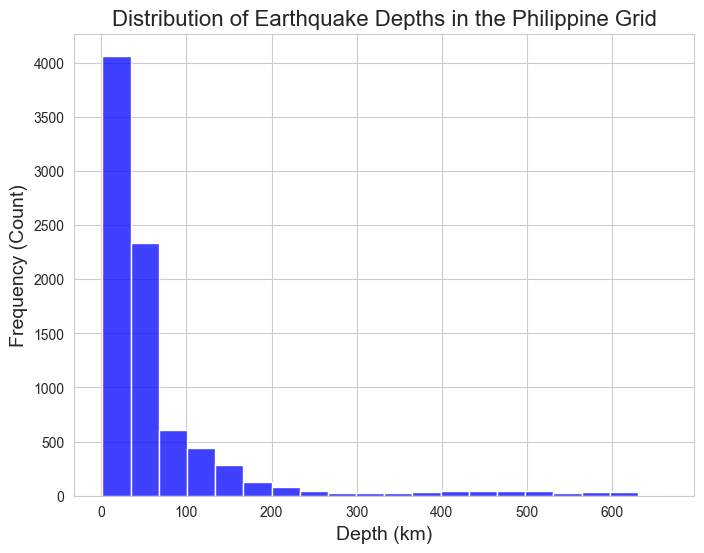

In [49]:
# Create a figure and axes
plt.figure(figsize=(8, 6))

# Create the histogram
sns.histplot(data=df_phi, x='Depth', bins=20, kde=False, color='blue')

# Add titles and labels
plt.title('Distribution of Earthquake Depths in the Philippine Grid', fontsize=16)
plt.xlabel('Depth (km)', fontsize=14)
plt.ylabel('Frequency (Count)', fontsize=14)

# Save and Show the plot
plt.savefig("depth_distribution_philippine.png", dpi=600)
plt.show()

In [50]:
# Filter for dataset of the African continent by Latitude & Longitude
df_af = df[(df['Lat'] > -40) & (df['Lat'] < 40) & (df['Lon'] > -17) & (df['Lon'] < 51)].copy()
df_af['Datetime'] = pd.to_datetime(df_af['Date'] + ' ' + df_af['Time']) # Combine data & time column into one time string.
df_af.reset_index(drop=True, inplace=True)  # Reset index
print(df_af)

            Date    Lat    Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0     1976/05/11  37.56  20.35   33.0  6.4     339   14   110  16:59:48.2   
1     1976/11/24  39.12  44.03   36.0  7.3     203   77     9  12:22:18.8   
2     1977/01/06  -2.51  28.70   21.0  5.3     241   45   -90  18:33:43.5   
3     1977/01/07 -31.28 -13.24   33.0  5.5      18   46   -59  14:38:22.4   
4     1977/02/24 -11.69 -13.62   33.0  5.5      74   71    11  08:51:16.6   
...          ...    ...    ...    ...  ...     ...  ...   ...         ...   
2383  2020/12/13 -17.75 -12.75   10.0  4.9     210   40   -32  06:42:00.0   
2384  2020/12/17  35.66  26.26   10.0  4.8     164   45  -116  13:36:45.4   
2385  2020/12/23  38.41  22.07   10.0  4.8     295   44   -59  14:58:24.7   
2386  2020/12/27  38.46  39.23    9.0  5.5     231   36   -22  06:37:32.9   
2387  2020/12/30  -1.25 -13.66   10.0  4.7     341   89     1  21:58:16.1   

                    Datetime  
0    1976-05-11 16:59:48.200  
1    1976-11-

In [51]:
print("Earthquake Count for Africa Continent (1976-2020):", len(df_af))

Earthquake Count for Africa Continent (1976-2020): 2388


In [52]:
# Visualise on the map to check if it's correct
map_africa = px.scatter_map(
    df_af,
    lat='Lat',
    lon='Lon',
    hover_name='Date',
    hover_data=['Time', 'Lat', 'Lon'],
    center={'lat': -41, 'lon': 174},
    zoom=3.5,
    width=800,
    height=800,
    map_style='carto-positron',
    title='The Earthquakes in the Africa Grid (1976-2020)<br><sup>Earthquake occurrence: 2388</sup>',
)

map_phi.show()

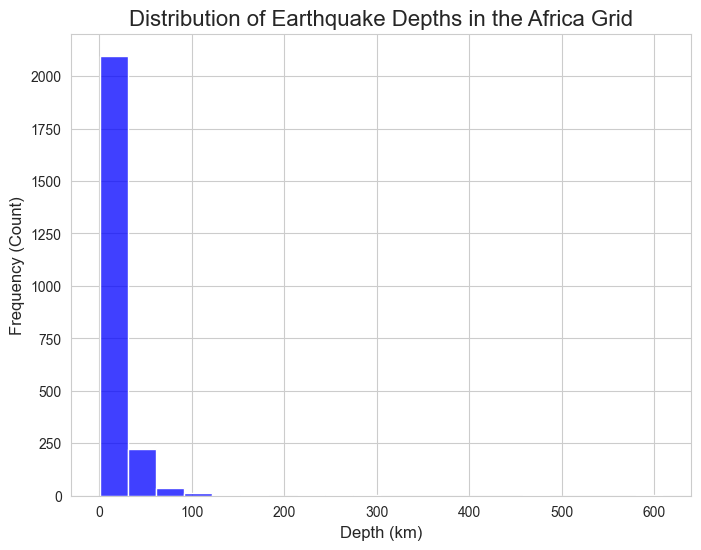

In [53]:
# Create a figure and axes
plt.figure(figsize=(8, 6))

# Create the histogram
sns.histplot(data=df_af, x='Depth', bins=20, kde=False, color='blue')

# Add titles and labels
plt.title('Distribution of Earthquake Depths in the Africa Grid', fontsize=16)
plt.xlabel('Depth (km)', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)

# Save and Show the plot
plt.savefig("depth_distribution_africa.png", dpi=600)
plt.show()

In [54]:
# Save the samples into CSVs.
df_nz.to_csv('sample_new_zealand. csv', index=False)
df_phi.to_csv('sample_philippines_plate. csv', index=False)
df_af.to_csv('sample_africa. csv', index=False)

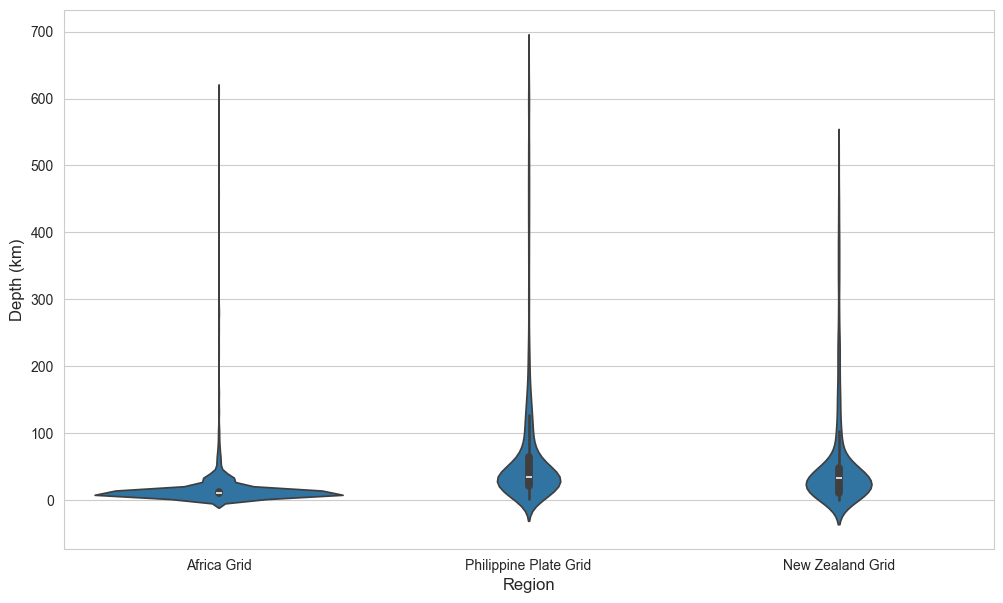

In [56]:
# --- Create the Violin Plot to Compare the Depths ---

# Africa depths
africa_depths = df_af['Depth']
df_africa_depths = pd.DataFrame({'Depth': africa_depths, 'Region': 'Africa Grid'})

# Philippine Plate depths
philippine_depths = df_phi['Depth']
df_philippine_depths = pd.DataFrame({'Depth': philippine_depths, 'Region': 'Philippine Plate Grid'})

# New Zealand depths
new_zealand_depths = df_nz['Depth']
df_new_zealand_depths = pd.DataFrame({'Depth': new_zealand_depths, 'Region': 'New Zealand Grid'})

# Combine the dataframes
df_combined = pd.concat([df_africa_depths, df_philippine_depths, df_new_zealand_depths])

# Create the violin plot
plt.figure(figsize=(12, 7))
sns.violinplot(data=df_combined, x='Region', y='Depth')

plt.xlabel('Region', fontsize=12)
plt.ylabel('Depth (km)', fontsize=12)

plt.savefig("depths_violinplot.png", dpi=600)
plt.show()

In [57]:
# Statistics of The Depths in Africa Grid
df_af['Depth'].describe()

count    2388.000000
mean       16.787395
std        26.760319
min         0.100000
25%        10.000000
50%        10.000000
75%        11.650000
max       609.800000
Name: Depth, dtype: float64

In [58]:
shallow_count_africa = (df_af['Depth'] < 70).sum()
print("Shallow Count (<70km):",shallow_count_africa)
print("Percentage Shallow:", (shallow_count_africa/len(df_af) * 100))

Shallow Count (<70km): 2336
Percentage Shallow: 97.82244556113902


In [59]:
# Statistics of The Depths in Philippine Plate Grid
df_phi['Depth'].describe()

count    8361.000000
mean       67.021529
std        97.577934
min         1.200000
25%        21.700000
50%        35.000000
75%        64.000000
max       664.000000
Name: Depth, dtype: float64

In [60]:
# Statistics of The Depths in New Zealand Grid
df_nz['Depth'].describe()

count    1542.000000
mean       54.332231
std        79.396632
min         0.600000
25%        10.000000
50%        33.000000
75%        47.375000
max       518.000000
Name: Depth, dtype: float64

In [64]:
# Fault Types
# Define the types of fault by rake
def classify_fault_type(rake):
    rake = float(rake)
    if -30 <= rake <= 30 or rake >= 150 or rake <= -150:
        return 'Strike-slip'
    elif 30 < rake < 150:
        return 'Reverse'
    elif -150 < rake < -30:
        return 'Normal'
    else:
        return 'Oblique'

# Apply the classify rule
df['fault_type'] = df['Rake'].apply(classify_fault_type)
df.head(3)

Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0  1976/01/01 -28.61 -177.64   59.0  6.2     202   30    93  01:29:39.6   
1  1976/01/05 -13.29  -74.90   95.0  6.0     350   28   -60  02:31:36.3   
2  1976/01/06  51.60  159.33   33.0  6.0     206   18    78  21:08:19.3   

  fault_type  
0    Reverse  
1     Normal  
2    Reverse